In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mass_csv

In [21]:
def get_list(file_name):
    file = pd.read_csv(file_name)
    L_moment = file['Long Moment (emu)']
    H = file['Field (Oe)']
    T = file['Temperature (K)']
    T = np.array(T)
    return L_moment, H, T

In [22]:
def clean_for_plot(chi_t, T):
    return chi_t[191:], T[191:]

In [23]:
def calculate_chiT(mass, L_moment, H, T):
    M = np.zeros(len(L_moment)) 
    chi_T = np.zeros(len(L_moment)) 

    for row in range (1, len(L_moment)):
        M[row] = L_moment[row]/mass

    for i in range(1, len(H)):
        chi_T[i] = (M[i]/H[i])*T[i]

    return chi_T, M

In [24]:
def calculate_molarmass(M, Lm, field):
    M_perf = ((3.5*field)/400)
    closest_index = min(range(len(M)), key=lambda i: abs(M[i] - M_perf))
    return (Lm[closest_index]*400)/(3.5*field)

In [25]:
def get_trans_temp(xT, T):          #arguments have to be already cleaned
    spin_half = (np.max(xT) + np.min(xT))/2
    half_len_xT = int((len(xT)+1)/2)

    closest_index_down = min(range(half_len_xT, len(xT)), key=lambda j: abs(xT[j] - spin_half))

    closest_index_up = min(range(0, half_len_xT), key=lambda j: abs(xT[j] - spin_half))
    # print(spin_half, half_len_xT, closest_index_down, closest_index_up)
    return T[closest_index_down], T[closest_index_up], xT[closest_index_down], xT[closest_index_up]

In [26]:
def plotting(tem_up, tem_down, T, xT, x_up, x_down):
    tem_down = round(tem_down)
    tem_up = round(tem_up)
    fig, ax = plt.subplots(1, 1)

    # Plotting the stems for valid indices
    ax.stem(tem_down, x_down, 'r', markerfmt="r ")
    ax.stem(tem_up, x_up, 'r', markerfmt="r ")

    # Plot the line
    ax.plot(T, xT)

    # Customize the plot using ax
    # ax.set_title('FeTrz_Trt_big_FC_FH')
    ax.set_ylim(0.7, 3.7)
    ax.set_xlim(290, 410)
    ax.set_xlabel('T [K]')
    ax.set_ylabel('χT [emu/mol K]')
    ax.set_xticks(np.concatenate([[300, 320, 340, 360, 380, 400], [tem_down, tem_up]]))
    ax.set_xticklabels(['300', '320', '340', '360', '380', '400'] + [str(tem_down), str(tem_up)])
    ticks = ax.get_xticklabels()
    ticks[-1].set_rotation(90)
    ticks[-2].set_rotation(90)
    plt.show()

In [27]:
def calculate_delta_temp(T_up, T_down, xT):
    delta = T_up - T_down
    proc_low_in_high = xT.min()/xT.max()*100
    print("w niskiej temperaturze jest ", round(proc_low_in_high, 2), " % fazy wysokospinowej")
    print("deltaT = ", round(delta, 2))

_____
FeTrz_Trt_big_FC_FH.rso

path: /home/fara/Documents/IFJ_2023/spin_crossover/dane/Trt_TEOS — kopia/Big TEOS


In [28]:
Trt_big_FC_FH_mass = mass_csv.get_mass()
Trt_big_FC_FH_mass = Trt_big_FC_FH_mass*2.5

Trt_big_FC_FH_L_m, Trt_big_FC_FH_H, Trt_big_FC_FH_T = get_list('FeTrz_Trt_big_FC_FH.rso.csv')
Trt_big_FC_FH_chiT, Trt_big_FC_FH_M = calculate_chiT(Trt_big_FC_FH_mass, Trt_big_FC_FH_L_m, Trt_big_FC_FH_H, Trt_big_FC_FH_T)

Trt_big_FC_FH_mass = calculate_molarmass(Trt_big_FC_FH_M, Trt_big_FC_FH_L_m, 1000)
Trt_big_FC_FH_chiT, Trt_big_FC_FH_M = calculate_chiT(Trt_big_FC_FH_mass, Trt_big_FC_FH_L_m, Trt_big_FC_FH_H, Trt_big_FC_FH_T)
Trt_big_FC_FH_chiT, Trt_big_FC_FH_T = clean_for_plot(Trt_big_FC_FH_chiT, Trt_big_FC_FH_T)

T_big_down, T_big_up, xT_big_down, xT_big_up = get_trans_temp(Trt_big_FC_FH_chiT, Trt_big_FC_FH_T)


calculate_delta_temp(T_big_up, T_big_down, Trt_big_FC_FH_chiT)

w niskiej temperaturze jest  24.87  % fazy wysokospinowej
deltaT =  23.24


BIG


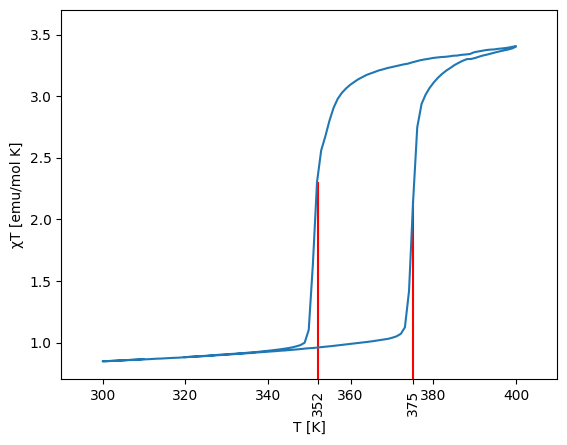

In [47]:
print('BIG')
plotting(T_big_up, T_big_down, Trt_big_FC_FH_T, Trt_big_FC_FH_chiT, xT_big_up, xT_big_down)

_____________________________________
FeTrz_Trt_medium_FC_FH.rso

/home/fara/Documents/IFJ_2023/spin_crossover/dane/Trt_TEOS — kopia/Medium TEOS

In [44]:
Trt_medium_FC_FH_mass = mass_csv.get_mass()
Trt_medium_FC_FH_L_m, Trt_medium_FC_FH_H, Trt_medium_FC_FH_T = get_list('FeTrz_Trt_medium_FC_FH.rso.csv')
Trt_medium_FC_FH_chiT, Trt_medium_FC_FH_M = calculate_chiT(Trt_medium_FC_FH_mass, Trt_medium_FC_FH_L_m, Trt_medium_FC_FH_H, Trt_medium_FC_FH_T)

Trt_medium_FC_FH_mass = calculate_molarmass(Trt_medium_FC_FH_M, Trt_medium_FC_FH_L_m, 1000)
Trt_medium_FC_FH_chiT, Trt_medium_FC_FH_M = calculate_chiT(Trt_medium_FC_FH_mass, Trt_medium_FC_FH_L_m, Trt_medium_FC_FH_H, Trt_medium_FC_FH_T)

Trt_medium_FC_FH_chiT, Trt_medium_FC_FH_T = clean_for_plot(Trt_medium_FC_FH_chiT, Trt_medium_FC_FH_T)

T_medium_down, T_medium_up, xT_medium_down, xT_medium_up = get_trans_temp(Trt_medium_FC_FH_chiT, Trt_medium_FC_FH_T)

calculate_delta_temp(T_medium_up, T_medium_down, Trt_medium_FC_FH_chiT)

w niskiej temperaturze jest  28.33  % fazy wysokospinowej
deltaT =  21.24


MEDIUM


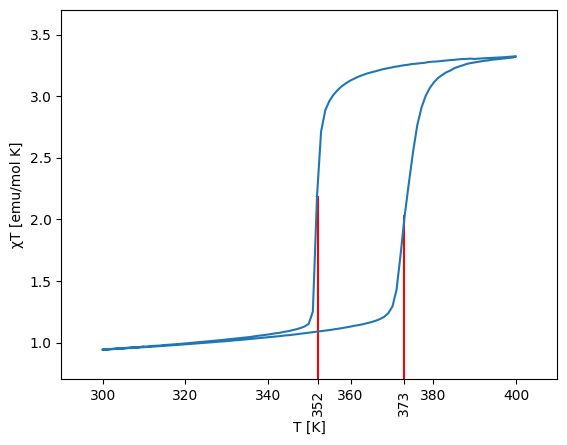

In [48]:
print('MEDIUM')
plotting(T_medium_up, T_medium_down, Trt_medium_FC_FH_T, Trt_medium_FC_FH_chiT, xT_medium_up, xT_medium_down)

_________________________
FeTrz_Trt_small_FC_FH.rso

In [45]:
Trt_small_FC_FH_mass = mass_csv.get_mass()
Trt_small_FC_FH_L_m, Trt_small_FC_FH_H, Trt_small_FC_FH_T = get_list('FeTrz_Trt_small_FC_FH.rso.csv')
Trt_small_FC_FH_chiT, Trt_small_FC_FH_M = calculate_chiT(Trt_small_FC_FH_mass, Trt_small_FC_FH_L_m, Trt_small_FC_FH_H, Trt_small_FC_FH_T)

Trt_small_FC_FH_mass = calculate_molarmass(Trt_small_FC_FH_M, Trt_small_FC_FH_L_m, 1000)
Trt_small_FC_FH_chiT, Trt_small_FC_FH_M = calculate_chiT(Trt_small_FC_FH_mass, Trt_small_FC_FH_L_m, Trt_small_FC_FH_H, Trt_small_FC_FH_T)

Trt_small_FC_FH_chiT, Trt_small_FC_FH_T = clean_for_plot(Trt_small_FC_FH_chiT, Trt_small_FC_FH_T)

T_small_down, T_small_up, xT_small_down, xT_small_up = get_trans_temp(Trt_small_FC_FH_chiT, Trt_small_FC_FH_T)

calculate_delta_temp(T_small_up, T_small_down, Trt_small_FC_FH_chiT)

w niskiej temperaturze jest  26.76  % fazy wysokospinowej
deltaT =  24.23


SMALL


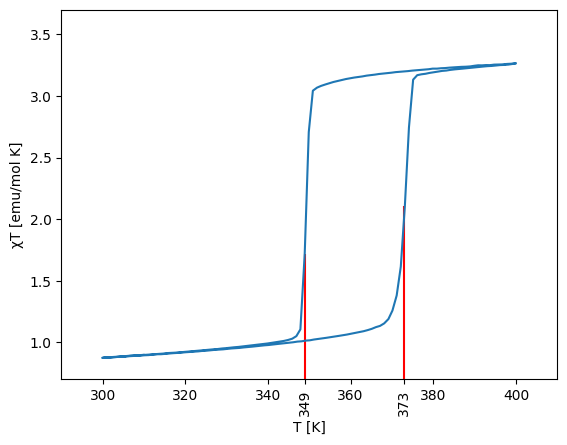

In [49]:
print('SMALL')
plotting(T_small_up, T_small_down, Trt_small_FC_FH_T, Trt_small_FC_FH_chiT, xT_small_up, xT_small_down)

____________________________
FeTrz_AOT_120nm_FC_FH.rso

In [46]:
AOT_120nm_FC_FH_mass = mass_csv.get_mass()
AOT_120nm_FC_FH_L_m, AOT_120nm_FC_FH_H, AOT_120nm_FC_FH_T = get_list('FeTrz_AOT_120nm_FC_FH.rso.csv')
AOT_120nm_FC_FH_chiT, AOT_120nm_FC_FH_M = calculate_chiT(AOT_120nm_FC_FH_mass, AOT_120nm_FC_FH_L_m, AOT_120nm_FC_FH_H, AOT_120nm_FC_FH_T)

AOT_120nm_FC_FH_mass = calculate_molarmass(AOT_120nm_FC_FH_M, AOT_120nm_FC_FH_L_m, 1000)
AOT_120nm_FC_FH_chiT, AOT_120nm_FC_FH_M = calculate_chiT(AOT_120nm_FC_FH_mass, AOT_120nm_FC_FH_L_m, AOT_120nm_FC_FH_H, AOT_120nm_FC_FH_T)

AOT_120nm_FC_FH_chiT, AOT_120nm_FC_FH_T = clean_for_plot(AOT_120nm_FC_FH_chiT, AOT_120nm_FC_FH_T)

T_120nm_down, T_120nm_up, xT_120nm_down, xT_120nm_up = get_trans_temp(AOT_120nm_FC_FH_chiT, AOT_120nm_FC_FH_T)

calculate_delta_temp(T_120nm_up, T_120nm_down, AOT_120nm_FC_FH_chiT)

w niskiej temperaturze jest  31.27  % fazy wysokospinowej
deltaT =  33.23


AOT 120nm


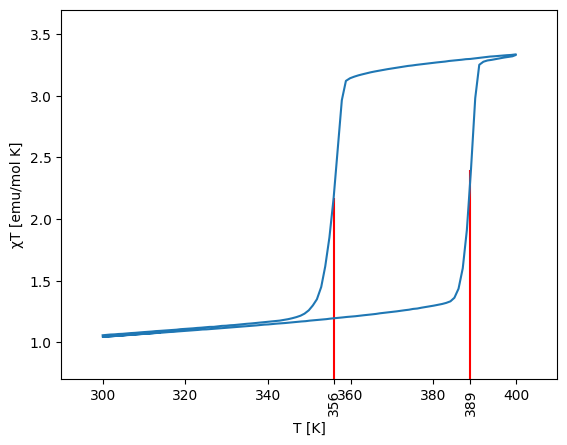

In [50]:
print('AOT 120nm')
plotting(T_120nm_up, T_120nm_down, AOT_120nm_FC_FH_T, AOT_120nm_FC_FH_chiT, xT_120nm_up, xT_120nm_down)